In [1]:
import sys
sys.path.append('/home/student/ROI/SparkProgram')

import pandas as pd
import matplotlib as mp
import numpy
from matplotlib import pyplot as plt
#from IPython.display import display

import pyspark_helpers as pyh
sc, spark, conf = pyh.initspark()
from pyspark_helpers import display

initializing pyspark
pyspark initialized


In [22]:
from pyspark.sql.types import *

#schema = StructType([StructField("lat", DoubleType())\
#                      ,StructField("lng", DoubleType())])

superchargers = [[33.679646, -117.174095]
[37.413353, -121.897995],
[37.525905, -122.006624],
[37.919969, -122.348976],
[38.730606, -120.788085],
[39.250765, -119.948927],
[36.916349, -121.773512],
[34.441994, -119.258898],
[36.11671, -115.168258],
[39.689269, -123.483443],
[27.7915, -82.332833],
[28.553648, -81.205429],
[29.624756, -82.376597],
[25.764706, -80.194629],
[28.331356, -81.532453],
[36.168897, -115.286579]]
df = spark.DataFrame(listsuperchargers)
display(df)

TypeError: list indices must be integers or slices, not tuple

In [15]:
# Let's just keep a few fields to start with for simplicity
#numeric_features = ['age','balance', 'duration', 'pdays']
#categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'campaign', 'poutcome', 'deposit']

#numeric_features = ['balance', 'duration', 'age']
numeric_features = []
categorical_features = ['marital', 'education']
target_label = None


df = dfRawFile.select(numeric_features + categorical_features)
display(df)
print(df.take(1))

,marital,education
0,married,secondary
1,married,secondary
2,married,secondary
3,married,secondary
4,married,tertiary
5,single,tertiary
6,married,tertiary
7,divorced,secondary
8,married,secondary
9,single,secondary


[Row(marital='married', education='secondary')]


In [16]:
# import imp
# imp.reload(pyh)

# print('Convert string features to indexed numeric values')
# df1 = pyh.StringIndexEncode(df, categorical_features + [target_label])
# display(df1)

# print('Convert indexed features to OneHotEncoded sparse matrix')
# df2 = pyh.OneHotEncode(df1, categorical_features)
# display(df2)

# print('Assemble all features and target label into vectors')
# df3 = pyh.AssembleFeatures(df2, categorical_features, numeric_features, target_label + '_Index')
# display(df3)
# df3.printSchema()

dfML = pyh.MakeMLDataFrame(df, categorical_features, numeric_features, target_label)
display(dfML)
dfML.printSchema()


,features
0,"(1.0, 0.0, 1.0, 0.0, 0.0)"
1,"(1.0, 0.0, 1.0, 0.0, 0.0)"
2,"(1.0, 0.0, 1.0, 0.0, 0.0)"
3,"(1.0, 0.0, 1.0, 0.0, 0.0)"
4,"(1.0, 0.0, 0.0, 1.0, 0.0)"
5,"(0.0, 1.0, 0.0, 1.0, 0.0)"
6,"(1.0, 0.0, 0.0, 1.0, 0.0)"
7,"(0.0, 0.0, 1.0, 0.0, 0.0)"
8,"(1.0, 0.0, 1.0, 0.0, 0.0)"
9,"(0.0, 1.0, 1.0, 0.0, 0.0)"


root
 |-- features: vector (nullable = true)



In [17]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures')
scaler_model = scaler.fit(dfML)
dfScaled = scaler_model.transform(dfML).select('scaledFeatures')
display(dfScaled)
dfScaled.printSchema()

,scaledFeatures
0,"(2.0192208794155144, 0.0, 2.000264446746398, 0..."
1,"(2.0192208794155144, 0.0, 2.000264446746398, 0..."
2,"(2.0192208794155144, 0.0, 2.000264446746398, 0..."
3,"(2.0192208794155144, 0.0, 2.000264446746398, 0..."
4,"(2.0192208794155144, 0.0, 0.0, 2.1257918829058..."
5,"(0.0, 2.152356996640074, 0.0, 2.12579188290588..."
6,"(2.0192208794155144, 0.0, 0.0, 2.1257918829058..."
7,"(0.0, 0.0, 2.000264446746398, 0.0, 0.0)"
8,"(2.0192208794155144, 0.0, 2.000264446746398, 0..."
9,"(0.0, 2.152356996640074, 2.000264446746398, 0...."


root
 |-- scaledFeatures: vector (nullable = true)



In [19]:
from pyspark.ml.clustering import KMeans
kMeans2 = KMeans(featuresCol='scaledFeatures', k=2).fit(dfScaled).transform(dfScaled)
display(kMeans2.groupBy('prediction').count())
print(kMeans2.centers)

kMeans3 = KMeans(featuresCol='scaledFeatures', k=3).fit(dfScaled).transform(dfScaled)
display(kMeans3.groupBy('prediction').count())
print(kMeans3.centers)


,prediction,count
0,1,3518
1,0,7644


AttributeError: 'DataFrame' object has no attribute 'centers'

In [8]:
#lrModel2 = LogisticRegression.load(filename1)

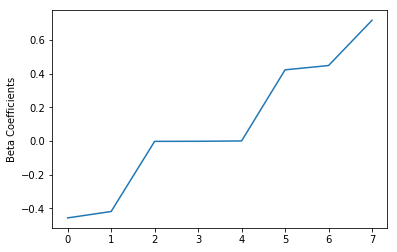

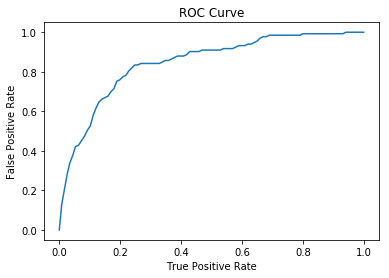

Training set area Under ROC: 0.8448896924361515


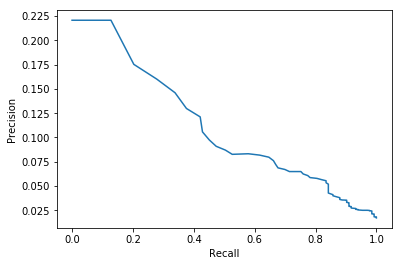

Test Area Under ROC 0.840867240867241
+----------+-----+
|prediction|count|
+----------+-----+
|       0.0| 3397|
|       1.0|    5|
+----------+-----+

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[3.37095670924290...|       0.0|[0.96678442701707...|
|  0.0|[3.38745309406212...|       0.0|[0.96731010408499...|
|  0.0|[3.37529517484003...|       0.0|[0.96692346333576...|
|  0.0|[3.36241312330678...|       0.0|[0.96650897600689...|
|  0.0|[3.40804656704141...|       0.0|[0.96795506617413...|
|  0.0|[3.36386138792909...|       0.0|[0.96655582376813...|
|  0.0|[3.44164278027247...|       0.0|[0.96898093076041...|
|  0.0|[3.39492946634091...|       0.0|[0.96754569225455...|
|  0.0|[3.44537780227697...|       0.0|[0.96909299746081...|
|  0.0|[3.37229694168628...|       0.0|[0.96682743804749...|
|  0.0|[3.37843940979149...|       0.0|[0.967023876264

In [9]:
lrPredictions, lrLog = pyh.predict_and_evaluate(lrModel, test)



In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
print('DT Trained')

filename1 = filename.replace('.','_') + '_DT_trainedModel'
dtModel.write().overwrite().save(filename1)
print('DT Saved')


In [ ]:
dtPredictions, dtLog = pyh.predict_and_evaluate(dtModel, test)


In [ ]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
print('RF Trained')

filename1 = filename.replace('.','_') + '_RF_trainedModel'
rfModel.write().overwrite().save(filename1)
print('RF Saved')



In [ ]:
rfPredictions, rfLog = pyh.predict_and_evaluate(rfModel, test)



In [ ]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
print ('GBT Trained')

filename1 = filename.replace('.','_') + '_GBT_trainedModel'
rfModel.write().overwrite().save(filename1)
print ('GBT Saved')



In [ ]:
gbtPredictions, gbtLog = pyh.predict_and_evaluate(gbtModel, test)

